# House Price Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

In [2]:
data = pd.read_csv('Data/housing.csv')

## Understanding the Data

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
print('The number of Records in the data is : ',len(data))

The number of Records in the data is :  20640


In [5]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
data[data['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,258100


Substituting the NaN values in No_of_Bedroom with any measure of central tendency isn't a clear step to undertake, and since the total number of missing values is within 1% of the total sample size, we can drop the Records with NaN values

## Treating Missing Values

In [7]:
data.dropna(inplace = True)

In [8]:
data.shape

(20433, 10)

Checking for any other Null value

In [9]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


So, we have 9 numeric columns and 1 non-numeric column ('ocean_proximity') in our data <br>
Now, 'median_house_value' is our target variable

## Some more insights of the data at hand

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The only categorical data in the dataset - ocean_proximity

In [12]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Lets see if we can find out some more information from ocean_proximity

In [13]:
op = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
for x in op:
    df = data[data['ocean_proximity'] == x]
    print(x,'  :  ', np.mean(df['median_house_value']))

NEAR BAY   :   259279.29207048457
<1H OCEAN   :   240267.99081248615
INLAND   :   124896.86314655172
NEAR OCEAN   :   249042.35502283106
ISLAND   :   380440.0


In [14]:
data['ocean_proximity'].replace(['INLAND','<1H OCEAN','NEAR OCEAN','NEAR BAY','ISLAND'], [1,2,3,4,5], inplace = True)

In [15]:
data['ocean_proximity'].unique()

array([4, 2, 1, 3, 5], dtype=int64)

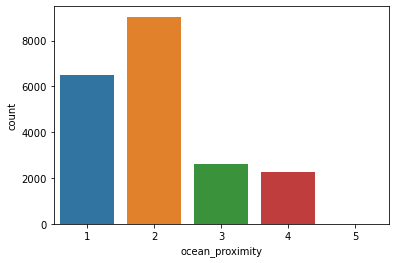

In [16]:
sns.countplot(data['ocean_proximity'])

The above plot shows the number of localities of each kind.

## Trying to gain some more insights about the data through Visualisation

Latitude and Logitude are geographical features and can not be quantified. Thus I decide to let them be.

Lets start with housing_median_age

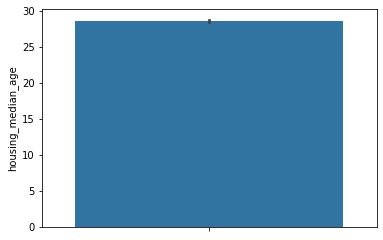

In [17]:
sns.barplot(y = data['housing_median_age'])

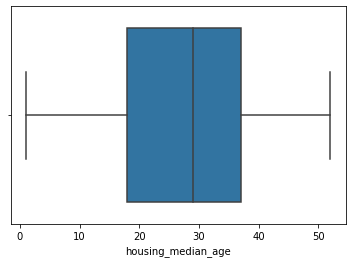

In [18]:
sns.boxplot(data['housing_median_age'])

'housing_median_age' seems pretty balanced and requires no further attention

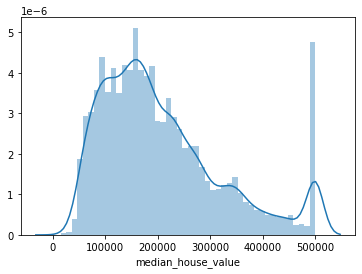

In [19]:
sns.distplot(data['median_house_value'])

the above plot shows the couunt of records with certain values of median_house_value

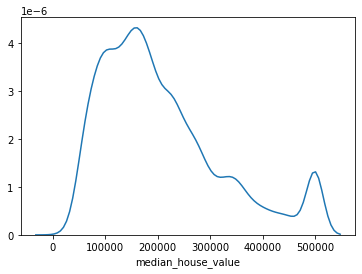

In [20]:
sns.distplot(data['median_house_value'], hist = False)

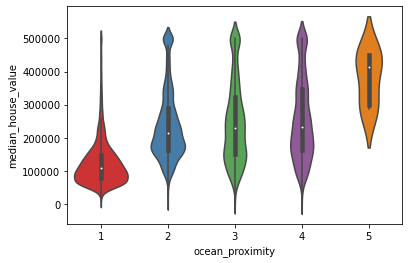

In [23]:
# median_house_value vs. Ocean Proximity
sns.violinplot(x = 'ocean_proximity', y = 'median_house_value', data = data, palette = 'Set1')

## Understanding Relationship between Data through HeatMap

In [24]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.271779,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,0.007637,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.295519,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,-0.032244,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,-0.010014,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.040096,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.011654,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.164069,0.688355
ocean_proximity,-0.271779,0.007637,0.295519,-0.032244,-0.010014,-0.040096,0.011654,0.164069,1.000000,0.396780
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,0.396780,1.000000


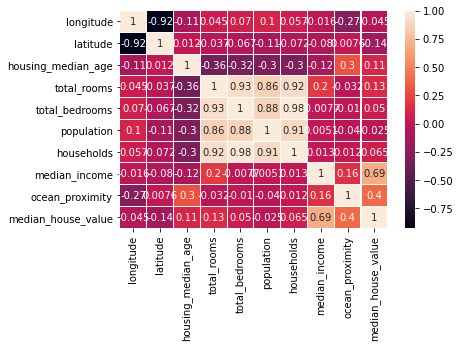

In [28]:
sns.heatmap(data.corr(), linewidths=0.1, annot = True)

Leaving out any data will make the models biased, so the predictions has to be made with all the data, intact

# Prediction Models

Lets partition the data into 2 parts, one - the predictor and the other being the target variable

In [37]:
x = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
y = data['median_house_value']

Let's import thetrain_test_split to split the data into training and testing data and LinearRegression Model from the sklearn.linear_model

# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)
print('Accuracy of Linear regression on test set: {:.6f}'.format(linear_regressor.score(x_test, y_test)))

Accuracy of Linear regression on test set: 0.653770


The Accuracy of the Linear model turn out to be <b>65.3770 %</b>.

## Decision-Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 7)

regr = DecisionTreeRegressor(max_depth=9)
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)
print('Accuracy of Decision-Tree Regressor on test set: {:.6f}'.format(regr.score(x_test, y_test)))

Accuracy of Decision-Tree Regressor on test set: 0.736268


The Accuracy od the model from Decision-Tree Regressor is <b>73.6268 % </b>.

## Random Forest Regressor

The Rondom Forest Regressor is seeded with :<br>
n_estimators = <b>200</b> <br> 
max_depth = <b>19</b> <br>
random_state = <b>2</b> <br>

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

regr = RandomForestRegressor(n_estimators = 200 , max_depth=19, random_state=2)
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)
print('Accuracy of Rondom Forest Regressor on test set: {:.6f}'.format(regr.score(x_test, y_test)))

Accuracy of Rondom Forest Regressor on test set: 0.832100


Accuracy of Rondom Forest Regressor on test set is <b>83.2100 %</b>

## Comparision of the Accuracy got on Different Models

In [68]:
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
accuracies = [65.3770, 73.6268, 83.2100]
conclusion = pd.DataFrame({'Models' : models , 'Accuracies' : accuracies})
conclusion

,Models,Accuracies
0,Linear Regression,65.3770
1,Decision Tree Regressor,73.6268
2,Random Forest Regressor,83.2100


### Submitted by : Subham Panigrahi